In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Maya Karai - athlete_events.csv')
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
#box plot of weight and height average male/female done
#histogram of age done
#noc total medal bar graph done
#nan in medal -> 0 done
#usa wins / year line graph done
#categorical scatter done
#interactive scatter plot each person's height and age done

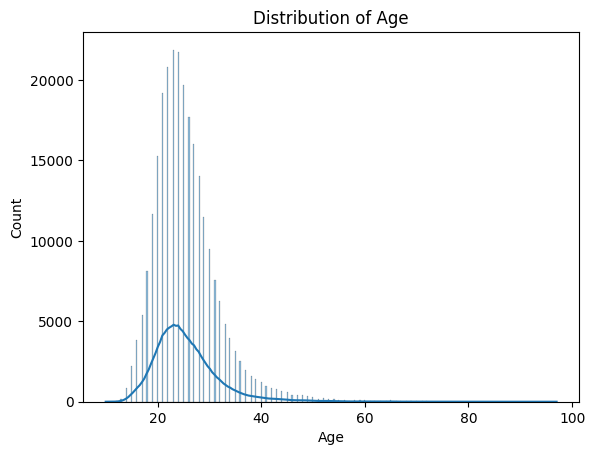

In [ ]:
data = df['Age']
sns.histplot(data, kde=True)
plt.title('Distribution of Age')
plt.show()

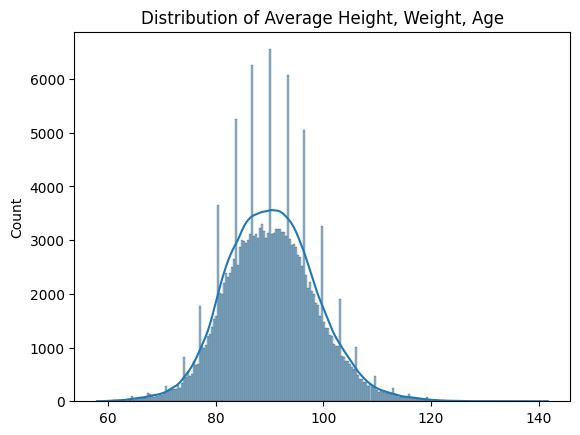

In [ ]:
avghwa = (df['Height']+df['Age']+df['Weight'])/3
sns.histplot(avghwa, kde=True)
plt.title('Distribution of Average Height, Weight, Age')
plt.show()

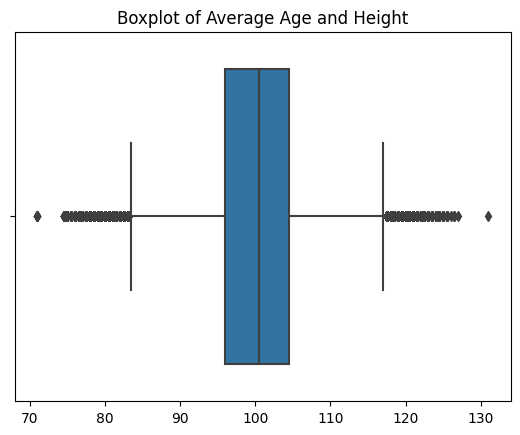

In [ ]:
data = (df['Age']+df['Height'])/2
sns.boxplot(x=data)
plt.title('Boxplot of Average Age and Height')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


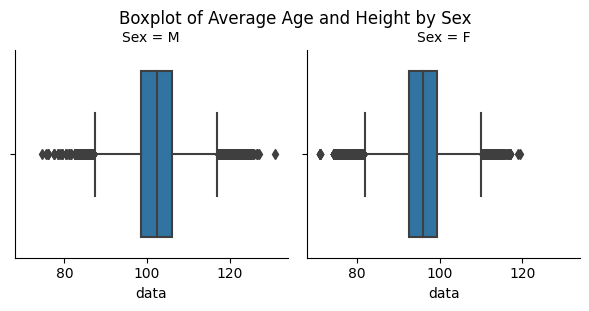

In [ ]:
df['data'] = (df['Age']+df['Height'])/2
g = sns.FacetGrid(df,col='Sex')
g.map(sns.boxplot,'data')
g.fig.suptitle('Boxplot of Average Age and Height by Sex', y=1.02)
plt.show()

In [ ]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [ ]:
df['Medal'].unique()

array([0, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
df['Medal'].fillna(0, inplace=True)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'NOC' and 'Medal'

# Group the data by 'NOC' (country) and count medals in each category
medal_counts = df.groupby('NOC')['Medal'].value_counts().unstack(fill_value=0)

# Calculate the total number of medals (gold + silver + bronze) for each country
medal_counts['Total'] = medal_counts['Gold'] + medal_counts['Silver'] + medal_counts['Bronze']

# Find the top 10 countries with the most total medals
top_10_countries = medal_counts['Total'].nlargest(10)

print("Top 10 countries with the most total medals:")
print(top_10_countries)


Top 10 countries with the most total medals:
NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Total, dtype: int64


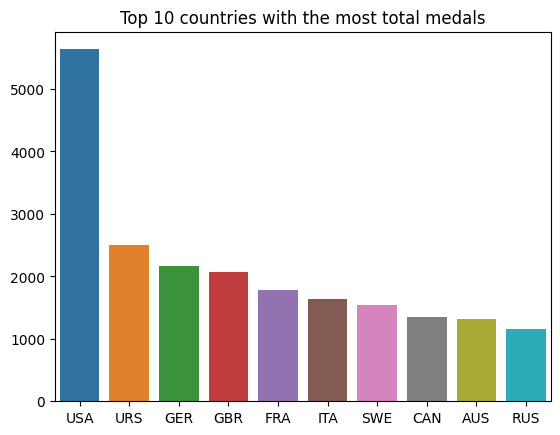

In [ ]:
categories = ['USA','URS','GER','GBR','FRA','ITA','SWE','CAN','AUS','RUS']
values = [5637,2503,2165,2068,1777,1637,1536,1352,1320,1165]
sns.barplot(x=categories,y=values)
plt.title("Top 10 countries with the most total medals")
plt.show()

In [ ]:
import altair as alt
import pandas as pd
import random

# Sample 5000 random rows from the DataFrame
random.seed(42)  # Set a random seed for reproducibility
sampled_df = df.sample(n=5000, random_state=42)

# Filter the sampled DataFrame to include only the specified countries
countries = ['USA', 'URS', 'GER', 'GBR', 'FRA']
filtered_df = sampled_df[sampled_df['NOC'].isin(countries)]

# Create the facet bar plot
bars = alt.Chart(filtered_df).mark_bar().encode(
    x=alt.X('Season:N', title='Season'),
    y=alt.Y('count():Q', title='Number of Medals'),
    color=alt.Color('Medal:N', title='Medal Type'),
    column=alt.Column('Medal:N', title='Medal Type')
).properties(
    width=150,
    height=150
)

bars


alt.Chart(...)

In [ ]:
import altair as alt
import pandas as pd
import random

# Randomly sample 5000 rows from your dataset
random.seed(42)  # For reproducibility
sampled_df = df.sample(n=5000)

# Filter the sampled DataFrame for the specified countries and seasons
countries = ['USA', 'URS']
seasons = ['Summer', 'Winter']
medals = ['Gold', 'Silver', 'Bronze', '0']
filtered_df = sampled_df[(sampled_df['NOC'].isin(countries)) & (sampled_df['Season'].isin(seasons)) & (sampled_df['Medal'].isin(medals))]

# Create bar plots
bars = alt.Chart(filtered_df).mark_bar().encode(
    x=alt.X('Medal:N', title='Medal Type'),
    y=alt.Y('count():Q', title='Number of Medals'),
    color=alt.Color('NOC:N', title='Country'),
    column=alt.Column('Season:N', title='Season')
).properties(
    width=150,
    height=150
)

bars


alt.Chart(...)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,data
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,102.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,96.5
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,103.0


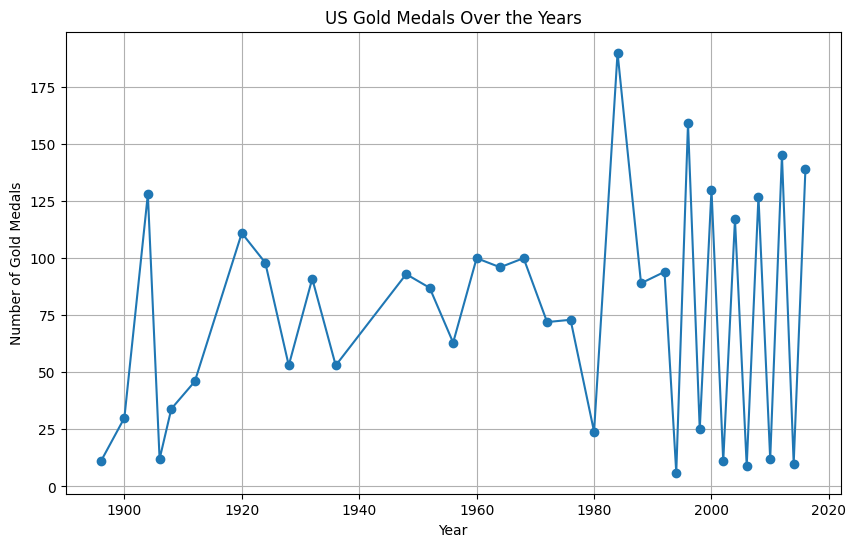

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with relevant columns

# Filter the DataFrame to only include rows where the country is 'USA' and the medal is 'Gold'
us_gold_medals = df[(df['NOC'] == 'USA') & (df['Medal'] == 'Gold')]

# Group the filtered DataFrame by 'Year' and count the number of gold medals each year
gold_medals_by_year = us_gold_medals.groupby('Year')['Medal'].count()

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(gold_medals_by_year.index, gold_medals_by_year.values, marker='o', linestyle='-')
plt.title('US Gold Medals Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.grid(True)

plt.show()


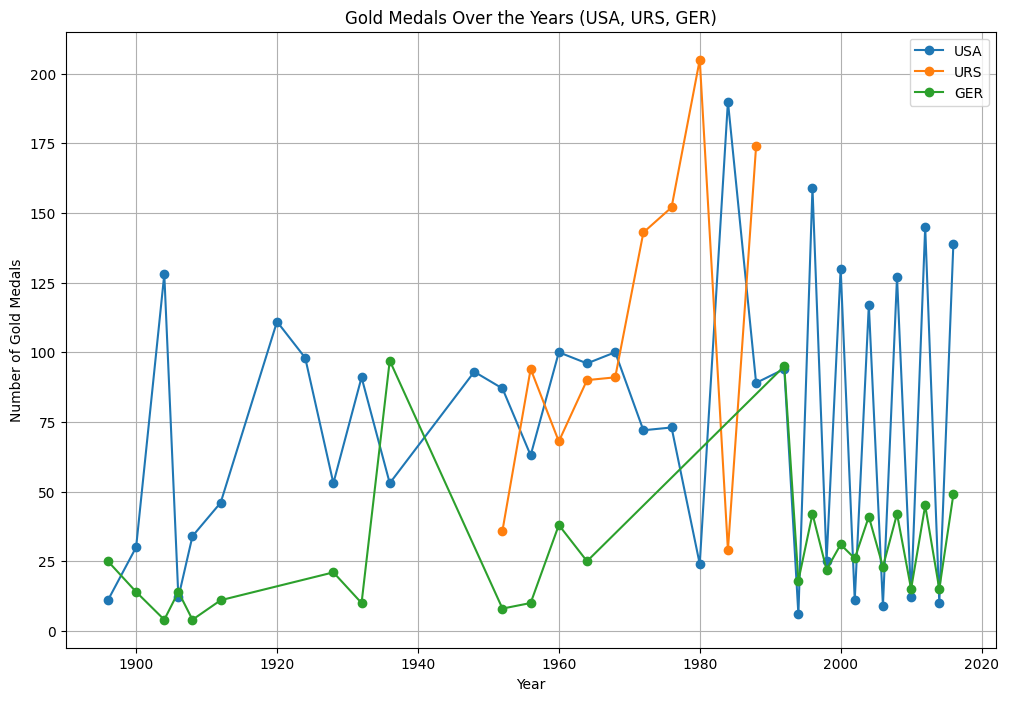

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with relevant columns

# Filter the DataFrame to include rows where the country is one of USA, URS, GER, GBR, or FRA and the medal is 'Gold'
countries = ['USA', 'URS', 'GER']
gold_medals_by_country = {}

for country in countries:
    gold_medals_by_country[country] = df[(df['NOC'] == country) & (df['Medal'] == 'Gold')]

# Group each filtered DataFrame by 'Year' and count the number of gold medals each year
gold_medals_by_year = {}

for country, medals_df in gold_medals_by_country.items():
    gold_medals_by_year[country] = medals_df.groupby('Year')['Medal'].count()

# Create a line plot
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

for country, medals_by_year in gold_medals_by_year.items():
    plt.plot(medals_by_year.index, medals_by_year.values, marker='o', linestyle='-', label=country)

plt.title('Gold Medals Over the Years (USA, URS, GER)')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()  # Add a legend to distinguish countries
plt.grid(True)

plt.show()


In [ ]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [ ]:
df.shape

(271116, 16)

In [ ]:
import altair as alt
import pandas as pd

# Sample 5000 random rows from your DataFrame
sampled_df = df.sample(n=5000, random_state=42)

# Create a categorical scatter plot using Altair with the sampled data
scatter = alt.Chart(sampled_df).mark_circle(size=60).encode(
    y=alt.X('Age:Q', title='Age of Medal Winner'),
    x=alt.Y('Medal:N', title='Medal Type'),
    color=alt.Color('Medal:N', legend=None),  # Remove legend
    tooltip=['Age:Q', 'Medal:N']
).properties(
    width=600,
    height=300
).interactive()

scatter


alt.Chart(...)

In [ ]:
#interactive scatter plot
sampleddf = df.sample(n=5000, random_state=42)
data = pd.DataFrame({
    'x':sampleddf['Height'],
    'y':sampleddf['Age'],
    'size':sampleddf['Weight']
})
alt.Chart(data).mark_circle().encode(
    x='x',
    y='y',
    size='size',
    tooltip=['x','y','size']
).interactive()

alt.Chart(...)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,data
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,102.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,96.5
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,103.0


In [ ]:
#average height by sport
#average hwa by sport

In [ ]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al